# Hausaufgabe 2
## Ablassung eines Stausees
<!-- Lizensiert unter (CC BY 4.0) Gert Herold, 2021 -->

Wegen Reparaturarbeiten an der Staumauer einer Talsperre soll das Wasser abgelassen werden. Der See habe ein Fassungsvermögen von $215 \cdot 10^6\,\text{m}^3$. Die Oberfläche des Stausees erstrecke sich über $10\,\text{km}^2$. Der Wasserauslass auf Grundhöhe habe einen Querschnitt von $2\,\text{m}^2$. Der Fluss selbst werde so umgeleitet, dass kein Wasser in den See nachfließen kann.

### 1) Anfangsbedingungen

**1.1) Es werde angenommen, die Form des Sees lasse sich mit einem umgedrehten [Kegel](https://de.wikipedia.org/wiki/Kegel_(Geometrie)) annähern. Wie tief ist dann der See?**

Speichern Sie das Ergebnis (in Metern) in der Variablen `h0` und geben Sie sie aus.

In [1]:
h0 = None 
# Hier eigenen Code schreiben ...
A0 = 10 * 10**6
V = 215 * 10**6
h0 = V*3/A0
print(h0)

64.5


In [2]:
# Hier ist ein Plausibilitäts-Test:
assert 60 < h0 < 80

Vereinfachend werde angenommen, dass die sich ausbildende Strömung sich mithilfe der [Bernoulli-Gleichung](https://de.wikipedia.org/wiki/Bernoulli-Gleichung) beschreiben lasse:

$$
\frac{u^2}{2}+\frac{p}{\rho}+g \, z = \text{const}
$$

Dabei beschreibt $u$ die Strömungsgeschwindigkeit des Fluids an einer beliebigen betrachteten Stelle, $p$ den hydrodynamischen Druck, $\rho$ die Dichte und $z$ die Höhe. $g=9{,}81\frac{\text{m}}{\text{s}^2}$ ist die Erdbeschleunigung. Werden nur die Seeoberfläche und der Ausfluss betrachtet, so kann der Druck $p$ ebenfalls als konstant angenommen werden, da er dem Umgebungsdruck entspricht. Ebenso wird die Dichte als konstant angenommen, und die obige Gleichung vereinfacht sich zu 

$$
\frac{u^2}{2}+g \, z = \text{const}
$$

bzw. für oben und unten:

$$
\frac{u_\text{oben}^2}{2}+g \, z_\text{oben} = \frac{u_\text{unten}^2}{2}+g \, z_\text{unten}
$$

**1.2) Berechnen Sie die sich anfangs ausbildende Strömungsgeschwindigkeit am Ausfluss $u_\text{unten,0}$ (`u_unten0`) in m/s sowie den Volumenstrom $\dot{V_0}$ (`Vdot0`) in m³/s unter der Annahme, dass die Bewegung der Seeoberfläche vernachlässigbar ist.**

In [3]:
u_unten0 = None
Vdot0 = None
# Hier eigenen Code schreiben ...
from math import sqrt, pi

g = 9.81
A_Auslass = 2

u_unten0 = sqrt(2*g*h0)
Vdot0 = A_Auslass * u_unten0

print(u_unten0)
print(Vdot0)

35.57372625969902
71.14745251939804


In [4]:
# Hier sind einige Plausibilitäts-Tests:
assert u_unten0 > 30
assert Vdot0 < 80

Tipp: Um die Kreiszahl $\pi$ unter Python verwenden zu können, muss man sie entweder selbst definieren oder z.B. aus dem [NumPy-Modul](https://numpy.org/) importieren. Für ein Beispiel den folgenden Code-Abschnitt öffnen.

In [5]:
# Importiere pi aus numpy
from numpy import pi

# Berechne den "Radius" der Seeoberfläche
r0 = (A0/pi)**0.5
print(f'Radius: {r0/1000:.2f} km')

Radius: 1.78 km


### 2) Leerung des Sees

**2.1) Schreiben Sie eine Funktion, die die Tiefe des "Kegel"-Sees (in Metern) allgemein abhängig von der enthaltenen Wassermenge bestimmt.**

Beachten Sie, dass sich die Form des Sees [nicht verändert](https://de.wikipedia.org/wiki/Strahlensatz) und somit der oben gegebene Wert für die Oberfläche nur bei vollem See gilt.

In [6]:
from math import pi
def tiefe(V):
    if V < 0:
        return 0
    else:
        return ((V*3*h0**2)/(pi*r0**2))**(1/3)

In [7]:
# Hier sind einige Plausibilitäts-Tests:
assert abs(h0-tiefe(215e6)) < 1e-5
assert abs(50-tiefe(1e8)) < 0.1

**2.2) Schreiben Sie eine Funktion, die den diskreten Zeitverlauf der Wassertiefe $h(t)$ bis zur Leerung des Sees zurückgibt.**

  * Die Funktion soll ein Startvolumen $V_0$ und eine Zeitschrittweite $\Delta t$ übergeben bekommen.
  * Verwenden Sie in den Berechnungen standardmäßig [SI-Einheiten](https://de.wikipedia.org/wiki/Internationales_Einheitensystem).
  * Beachten Sie, dass sich auch der Volumenstrom zeitlich ändert.
  * Die Funktion soll alle berechneten Zeiten und die jeweils zugehörigen Tiefen in zwei getrennten Listen zurückgeben.
  
Hinweis: Die Änderung des Volumens lässt sich annähernd über $V_{n+1}=V_n-\dot{V_n} \cdot \Delta t$ beschreiben.

In [8]:
def abfluss(V0, dt):
    t_n = 0     # Initialisierung der Variablen die im Loop verwendet werden
    V_n = V0
    tiefe_berechnet = tiefe(V_n)
    
    werteTiefe = []   # Diese Listen werden am Ende die Werte für das Volumen und die Zeit enthalten
    werteZeit = []
    
    while tiefe_berechnet > 0:      # Solange der See nicht leer ist
        werteTiefe.append(tiefe_berechnet)
        werteZeit.append(t_n)
        t_n += dt
        u = sqrt(2 * 9.81 * tiefe_berechnet)
        v_dot = 2 * u
        V_n = V_n - v_dot * dt
        tiefe_berechnet = tiefe(V_n)

    return werteTiefe, werteZeit

# abflussV2 erlaubt das einsetzen einer beliebigen Funktion für die Tiefe, sodass es möglich ist, mit wenig Code einen See mit einer neuen Form zu berechnen
def abflussV2(V0, dt, tiefenFunktion = tiefe):  # Standard: Kegelförmig (tiefe)
    t_n = 0
    V_n = V0
    tiefe_berechnet = tiefenFunktion(V_n)   # Übergebene Funktion zur Berechnung der Tiefe wird verwendet => ermöglicht Funktion für zylinderförmigen See
    
    werteTiefe = []
    werteZeit = []
    
    while tiefe_berechnet > 0:
        werteTiefe.append(tiefe_berechnet)
        werteZeit.append(t_n)
        t_n += dt
        u = sqrt(2 * 9.81 * tiefe_berechnet)
        v_dot = 2 * u
        V_n = V_n - v_dot * dt
        tiefe_berechnet = tiefenFunktion(V_n)   # Übergebene Funktion zur Berechnung der Tiefe wird verwendet => ermöglicht Funktion für zylinderförmigen See

    return werteTiefe, werteZeit


In [9]:
# Hier sind einige Plausibilitäts-Tests:
assert len(abfluss(10,1))==2
assert type(abfluss(10,1)[0])==type(abfluss(10,1)[1])==list

# V2 (mit flexibler Funktion für die Tiefe)
assert len(abflussV2(10,1))==2
assert type(abflussV2(10,1)[0])==type(abflussV2(10,1)[1])==list

**2.3) Wie lange dauert es, bis der Stausee komplett abgelassen wurde?** 

Plotten Sie den Zeitverlauf der Wassertiefe bis zur Leerung für zwei Zeitschrittweiten:
  * $\Delta t_1$ = 1 Minute
  * $\Delta t_2$ = 4 Tage

**Diskutieren Sie Auffälligkeiten.**

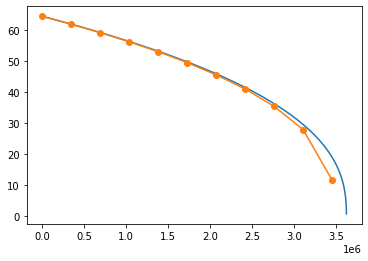

In [10]:
%matplotlib inline
from matplotlib.pyplot import plot, show
# Plotbefehl: plot(x_werte_liste, y_werte_liste)
# Hier eigenen Code schreiben ...
result1 = abflussV2(V, 60)
result2 = abflussV2(V, 345600)
plot(result1[1], result1[0])
plot(result2[1], result2[0], marker = "o")
show()

Es ist zu erkennen, dass die beiden Plots sehr ähnlich sind. Sie beginnen beide beim gleichen Wert und in beiden Fällen ist der See nach etwas über $\frac{3.5\times 10^6s}{60\times 60\times 24}=40.5$ Tagen leer. Im weiteren Verlauf unterscheiden sie sich vor allem in der unterschiedlichen Anzahl der Datenpunkte, da für den zweiten Plot größere Zeitintervalle $\Delta t$ zur Berechnung verwendet wurden.\
Der Verlauf des Graphen ist wie zu erwarten - einerseits ist die Tiefe $z$ vom Volumen $V$ abhängig ($z\propto\sqrt[3]{V}$), andererseits erschließt sich auch logisch, dass sich die Tiefe eines kegelförmigen Sees zu Beginn langsam und später schnell verringert, da die Spitze eines Kegels wesentlich weniger Volumen fasst.\
Auffällig ist, dass die Tiefe im zweiten Plot erst später 0 erreicht, also der See erst später leer ist. Dies ist ebenfalls dem größeren Abstand der Datenpunkte geschuldet: Eigentlich ist der See schon früher leer. Durch die großen zeitlichen Schritte wird jedoch beim Entleeren des Sees über das Ziel "hinausgeschossen", d.h. das Volumen erreicht einen negativen Wert. Dieser negative Wert wird in `tiefe()` jedoch auf 0 gesetzt, da ein negativer Füllstand des Sees realitätsfern ist.

### 3) Anderer See

Wiederholen Sie Aufgabenteil 2.3) unter der Annahme, dass der See bei gleichem Volumen und gleicher Oberfläche annähernd durch einen *Zylinder* beschrieben wird. Schreiben Sie hierfür möglichst wenig neuen Code.

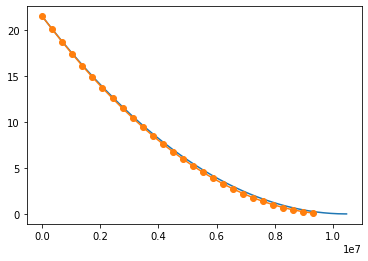

In [11]:
# Hier eigenen Code schreiben ...
def tiefeZyl(V):    # Neue Funktion für die Berechnung der Tiefe, sonst bleibt alles gleich
    if V < 0:
        return 0
    else:
        h = V/(pi*r0**2)
        return h

result1 = abflussV2(V, 60, tiefeZyl)
result2 = abflussV2(V, 345600, tiefeZyl)
plot(result1[1], result1[0])
plot(result2[1], result2[0], marker = "o")
show()

In diesem Fall ist die Tiefe proportional zum Volumen ($z\propto V$). Die Tiefe nimmt zum Schluss langsamer ab, da sich der Volumenstrom mit abnehmender Tiefe ebenfalls verringert und sich der See so langsamer entleert.\
Was hier heraussticht, ist, dass der See im Falle von einem größeren $\Delta t$ offenbar früher leer ist. Die gesamte Dauer des Entleeren ist so groß, dass der Effekt von *2.3* nicht zur Erklärung ausreicht. Stattdessen macht sich hier die zugrundeliegende Formel bemerkbar: Mit $V_{n+1}=V_n-\dot{V_n} \cdot \Delta t$ ist das Volumen zum Zeitpunkt $n+1$ sowohl über das Volumen $V_n$ als auch über den Volumenstrom $\dot{V}_n$ vom Zeitpunkt $n$ der Iteration zuvor definiert. Problematisch ist dabei, dass der Volumenstrom zum Zeitpunkt $n$ für den gesamten Zeitraum bis $n+1$ verwendet wird und somit aufgrund des höheren Volumens und der größeren Tiefe ein größerer Volumenfluss in die Formel eingeht, als eigentlich vorhanden. Tatsächlich müsste der Volumenstrom realistisch auch in der Zwischenzeit abnehmen. Durch die zahlreichen Iterationen kumuliert sich der Effekt so stark, dass er im Plot deutlich sichtbar wird.\
Es zeigt sich hier, dass ein kleineres $\Delta t$ einen großen Einfluss auf die Qualität der Berechnungen hat.